## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Please install GPU version of TF


In [3]:
tf.test.gpu_device_name()

''

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [7]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [11]:
 # view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1164 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 76 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\yoges\anaconda3\envs\tensorflow2\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
37/37 [==============================] - 110s 3s/step - loss: 0.7844 - accuracy: 0.6838 - val_loss: 0.2481 - val_accuracy: 0.8684
Epoch 2/20
37/37 [==============================] - 135s 4s/step - loss: 0.3134 - accuracy: 0.8608 - val_loss: 0.2694 - val_accuracy: 0.8553
Epoch 3/20
37/37 [==============================] - 129s 3s/step - loss: 0.2100 - accuracy: 0.9141 - val_loss: 0.3727 - val_accuracy: 0.8816
Epoch 4/20
37/37 [==============================] - 146s 4s/step - loss: 0.1673 - accuracy: 0.9373 - val_loss: 0.3488 - val_accuracy: 0.8947
Epoch 5/20
37/37 [==============================] - 144s 4s/step - loss: 0.1220 - accuracy: 0.9605 - val_loss: 0.2595 - val_accuracy: 0.8816
Epoch 6/20
37/37 [==============================] - 133s 4s/step - loss: 0.1135 - accuracy: 0.9588 - val_loss: 0.3748 - val_accuracy: 0.8947
Epoch 7/20
37/37 [==============================] - 127s 3s/step - loss: 0.1029 - accuracy: 0.9691 - val_loss: 0.2750 - val_accuracy: 0.8553
Epoch 8/20
37

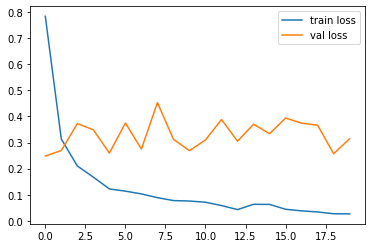

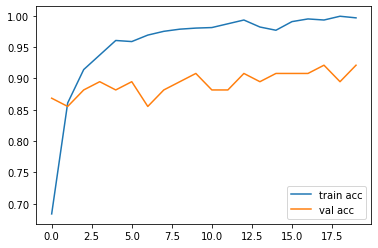

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [19]:

y_pred = model.predict(test_set)


In [20]:
y_pred

array([[1.85148235e-06, 9.99998093e-01],
       [1.11684322e-07, 9.99999881e-01],
       [1.58831686e-01, 8.41168284e-01],
       [7.97619402e-01, 2.02380568e-01],
       [9.80864823e-01, 1.91351473e-02],
       [9.97756779e-01, 2.24325131e-03],
       [5.14113162e-06, 9.99994874e-01],
       [7.09801093e-02, 9.29019868e-01],
       [1.17606604e-02, 9.88239288e-01],
       [9.91227210e-01, 8.77275411e-03],
       [2.07399530e-03, 9.97925997e-01],
       [9.97775972e-01, 2.22405768e-03],
       [9.56756353e-01, 4.32436951e-02],
       [4.19977795e-08, 1.00000000e+00],
       [9.64237094e-01, 3.57629433e-02],
       [2.87568067e-08, 1.00000000e+00],
       [6.48597628e-02, 9.35140193e-01],
       [1.31783420e-02, 9.86821711e-01],
       [9.92464662e-01, 7.53537146e-03],
       [9.99424219e-01, 5.75844548e-04],
       [9.95397270e-01, 4.60277498e-03],
       [9.99996185e-01, 3.82075223e-06],
       [1.14533550e-03, 9.98854637e-01],
       [8.32551450e-05, 9.99916792e-01],
       [9.971683

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_vgg16.h5')

In [26]:
img_data

NameError: name 'img_data' is not defined

In [29]:
img=image.load_img('Datasets/test/cats/cat.4259.jpg',target_size=(224,224))



In [30]:
x=image.img_to_array(img)
x

array([[[138., 150., 128.],
        [137., 149., 127.],
        [139., 151., 129.],
        ...,
        [ 92.,  97.,  91.],
        [ 96.,  98.,  93.],
        [ 96.,  98.,  93.]],

       [[137., 149., 127.],
        [141., 153., 131.],
        [141., 153., 131.],
        ...,
        [ 95., 100.,  94.],
        [ 94.,  96.,  91.],
        [ 94.,  96.,  91.]],

       [[139., 151., 129.],
        [141., 153., 131.],
        [141., 153., 131.],
        ...,
        [ 95., 100.,  94.],
        [ 95.,  97.,  92.],
        [ 95.,  97.,  92.]],

       ...,

       [[158., 170., 182.],
        [171., 183., 195.],
        [166., 178., 190.],
        ...,
        [ 99., 103.,  88.],
        [106., 100.,  84.],
        [109., 100.,  85.]],

       [[165., 177., 191.],
        [167., 179., 193.],
        [159., 171., 185.],
        ...,
        [110., 111.,  93.],
        [120., 111.,  94.],
        [112., 101.,  83.]],

       [[164., 176., 188.],
        [162., 174., 186.],
        [168., 1

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)

array([[0.9886481 , 0.01135193]], dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

In [36]:
a==1

array([False])